In [7]:
%run "setup.py"


%matplotlib inline 


"---Image Stats---\n Shape: (640, 427) \n Type: <class 'numpy.ndarray'> \n Mean: 0.1817940605684897 \n Median: 0.1788121568627451 \n Max: 0.998586274509804 \n Min: 0.0 "

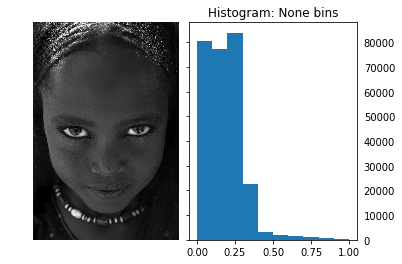

In [2]:
fname = "media/img2.jpg"
img = image.AnImage(fname)
img.stats
img.show()

# Filter Implementations

Default Equalize


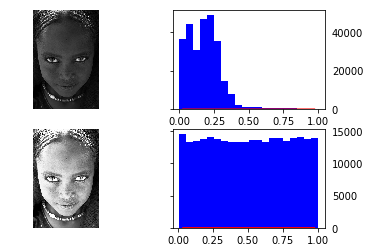

Adaptive Equalize


/home/moranis/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


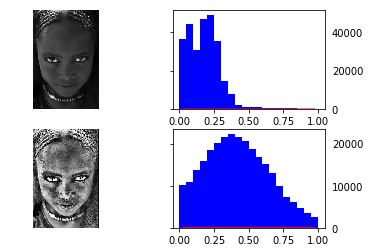

Percentile Rescaling - Contrast Stretching


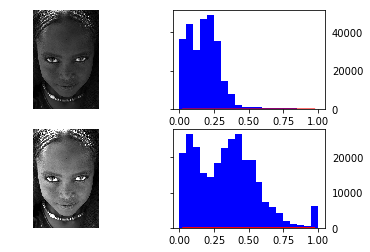

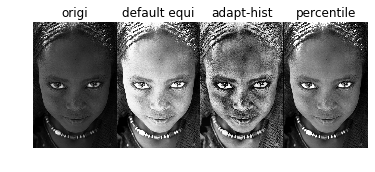

In [3]:
plotter.Junkie.equlization_flow(fname, nc=4)

After Percentile Rescaling - Contrast Stretching


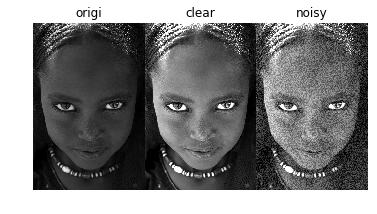

In [10]:
print('After Percentile Rescaling - Contrast Stretching')
clear_img = plotter.Junkie.equalize_histogram(img.img, method=0) 
noisy_img = plotter.Junkie.equalize_histogram(img.noisy, method=0)  #img.noisy
plotter.show_image_list([img.img, clear_img, noisy_img], titlez=['origi', 'clear', 'noisy'], nc=3)

## Blur/Smoothing Filters

- Gaussian blur 
- Box or mean/average blur 
- Meadian blur
- Chain multiple filters


Blurring/Smoothing with 13x13 size kernel


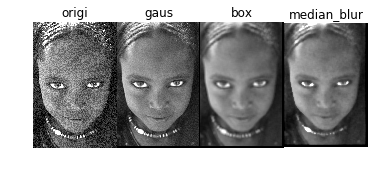

In [5]:
k = 13
print(f"Blurring/Smoothing with {k}x{k} size kernel")

gaus_blur = filters.BaseFilter.apply(noisy_img, 
                                     kernels.make_gaussian_kern(k))
box_blur = filters.BaseFilter.apply(noisy_img, kernels.make_box_kern(k))

median_blur = filters.MedianFilter.apply(noisy_img, k)

plotter.show_image_list(
    [noisy_img, gaus_blur, box_blur, median_blur],
    titlez=['origi','gaus', 'box', 'median_blur'], 
    nc=4
    )

Edges/Sharpening with 13x13 size kernel. Working on a clear/smoothed image


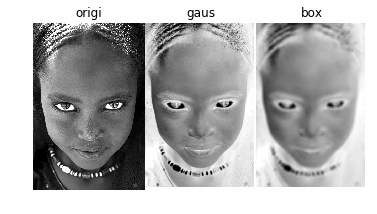

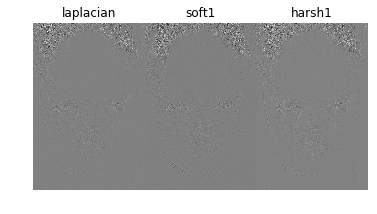

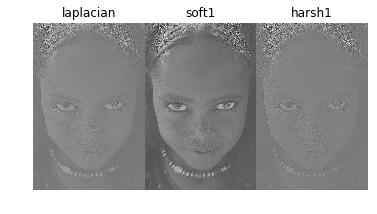

In [56]:
k = 13
simg = clear_img
print(f"Edges/Sharpening with {k}x{k} size kernel. Working on a clear/smoothed image")

gaus_edge = filters.BaseFilter.apply(simg, 
                                     -1*kernels.make_gaussian_kern(k))

box_edge = filters.BaseFilter.apply(simg, -1*kernels.make_box_kern(k))

laplacian_edge = filters.BaseFilter.apply(simg,
                                         kernels.make_laplacian_ker(k) )


soft1_edge = filters.BaseFilter.apply(simg,
                                         kernels.make_edge_soft1(k) )


harsh1_edge = filters.BaseFilter.apply(simg,
                                         kernels.make_edge_harsh1(k) )


plotter.show_image_list(
    [simg, gaus_edge, box_edge],
    titlez=['origi','gaus', 'box'], 
    nc=3
    )

plt.clf();

plotter.show_image_list(
    [laplacian_edge, soft1_edge, harsh1_edge],
    titlez=['laplacian', 'soft1', 'harsh1'], 
    nc=3
    )


plt.clf();

plotter.show_image_list(
    [simg+laplacian_edge, simg+soft1_edge, simg+harsh1_edge],
    titlez=['laplacian', 'soft1', 'harsh1'], 
    nc=3
    )

plt.show();

In [57]:
def compare_edgerz(i=0, j=1, k=2, s= -100, simg=clear_img):
    edgez = [laplacian_edge, soft1_edge, harsh1_edge]
    namez = ['laplacian', 'soft1', 'harsh1']
    plotter.show_image_list(
        [ np.abs(edgez[i] - edgez[j])*s, np.abs(edgez[j] - edgez[k])*s,], # clear_img+harsh1_edge*s],
        titlez=[f"{namez[i]} - {namez[j]}", f"{namez[j]} - {namez[k]}",], # 'harsh1'], 
        nc=2
        )
    plt.clf();

    plotter.show_image_list(
        [edgez[i]*s, edgez[j]*s,], # harsh1_edge*s],
        titlez=[namez[i], namez[j],],  # 'harsh1'], 
        nc=2
        )


    plt.clf();

    plotter.show_image_list(
        [simg+edgez[i]*s, simg+edgez[j]*s,], # clear_img+harsh1_edge*s],
        titlez=[ f"img+{namez[t]}" for t in (i, j)], # 'harsh1'], 
        nc=2
        )


    plt.clf();    
    
    plotter.show_image_list(
        [simg, simg+edgez[i]*s,], # harsh1_edge*s],
        titlez=['origi', namez[i],],  # 'harsh1'], 
        nc=2
        )



    plt.show();

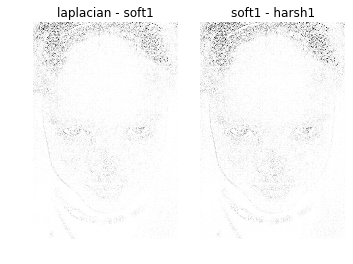

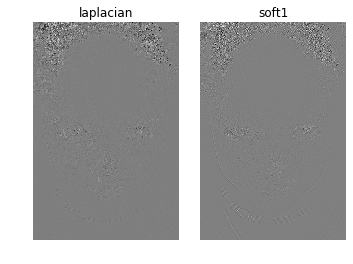

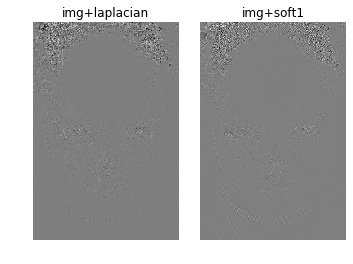

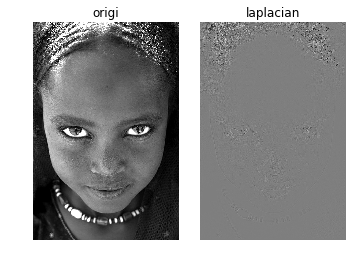

In [58]:
compare_edgerz();

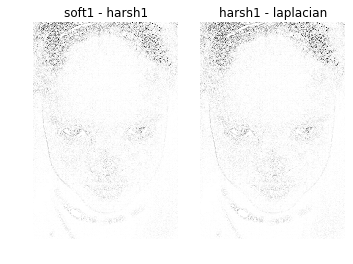

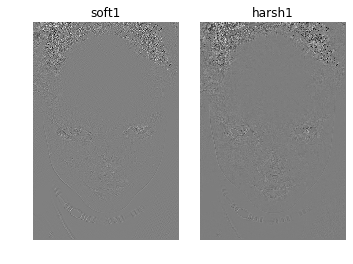

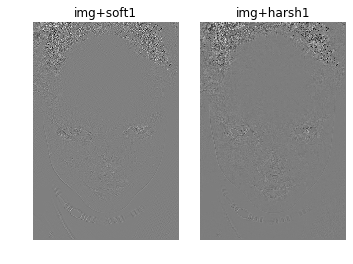

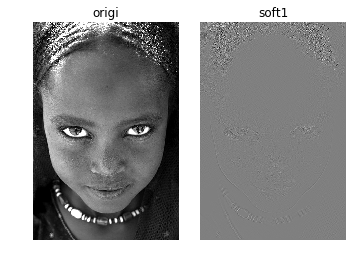

In [59]:
compare_edgerz(1, 2, 0);

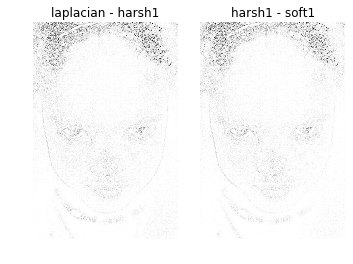

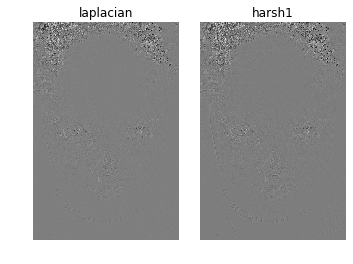

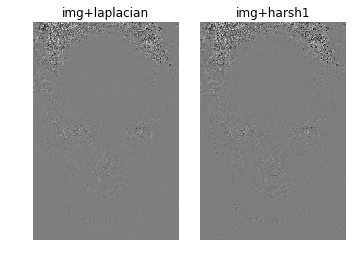

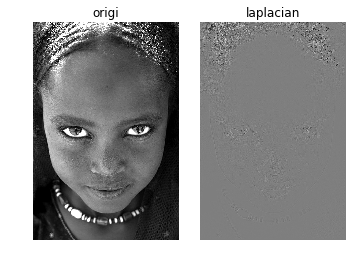

In [60]:
compare_edgerz(0,2,1);

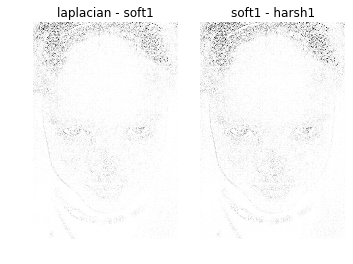

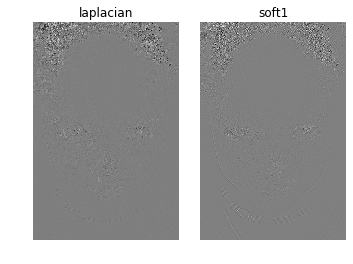

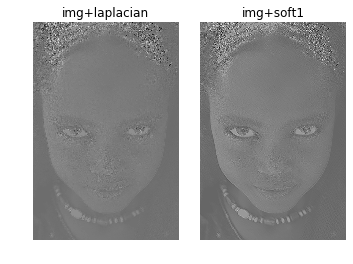

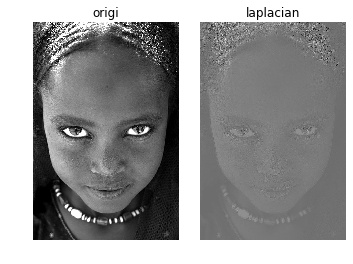

In [65]:
compare_edgerz(s=-1, simg=clear_img);

## SkImage Filters
[Docs](https://scikit-image.org/docs/dev/api/skimage.filters.html)

**Blur/Smoothing**
- gaussian
- median  


**Edges/Sharpening**
- unsharp mask - $sharps = origi - smoothed$. $output = shaprs*scaler + origi$

- laplacian

- wiener - minimum mean square error inverse filter 

- hessian - find continuous edges e.g. vessels, wrinkles, rivers. Calc % of these edges in the image 

- meijering - similar uses as hessian. Calculates the eigenvectors of the hessian in order to compute similarities to neurites. A neurite is a 

- sato - sato tubeness filter. similar uses and overarching operation as meijering


**Methods with both horizontal and vertical direction or cross**
TODO: rotation invariance and quality of filter 

- sobel - 
 

- prewit - prewit transform

- scharr - scharr transform

- roberts - cross operator means . 


In [124]:
def run_smoothers(img):
    print('Blur/Smoothing Filters')
    
    filterz = [(skimage.filters.gaussian,{}),
              (skimage.filters.median, {}),  
              ]
    namez = ['gaussian', 'median',   
              ]
    plotter.show_image_list([img], titlez=['origi'])
    plt.clf()
    
    n = len(filterz)
    c = min(3,n)
    runz = n // 3
    runz += 0 if (n%3==0) else 1
    for i in range(runz):
        outsiez = []
        for x in range(c):
            xi = x+(i*c)            
            outsiez.append( ( filterz[xi][0](img,**filterz[xi][1]), namez[xi]) )
        
        
        plotter.show_image_list( [x[0] for x in outsiez], titlez=[x[1] for x in outsiez] , nc=c)
        plt.clf();
        
    plt.show();

Blur/Smoothing Filters


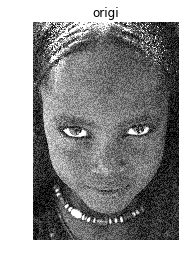

0
1


/home/moranis/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


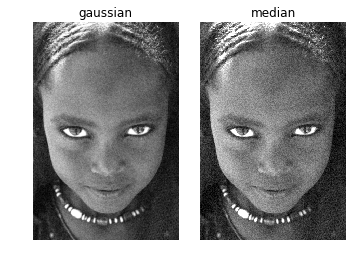

<Figure size 432x288 with 0 Axes>

In [106]:
run_smoothers(noisy_img)

In [210]:
def run_edgerz(img):
    print('Edge/Sharpening Filters')
    
    filterz = [(skimage.filters.laplace,{}),
              (skimage.filters.sobel, {}),   
#               (skimage.filters.wiener, {'impulse_response':skimage.filters.LPIFilter2D(3)}),  
              (skimage.filters.hessian, {}),   
#               (skimage.filters.meijering, {}),   
#               (skimage.filters.sato, {}), 
              (skimage.filters.roberts, {}),  
              (skimage.filters.prewitt, {}),  
              (skimage.filters.scharr, {}),
#               (skimage.filters.unsharp_mask, {}),   
              ]
    namez = ['laplace', 'sobel', 
#              'wiener', 
             'hessian',
#              'meijering', 'sato'
             'roberts', 'prewitt', 'scharr', 
#              'unsharp'
              ]
    plotter.show_image_list([img], titlez=['origi'])
    plt.clf()
    
    n = len(filterz)
    c = min(3,n)
    runz = n // 3
    runz += 0 if (n%3==0) else 1
    for i in range(runz):
        outsiez = []
        for x in range(c):
            xi = x+(i*c) 
            outsiez.append( ( filterz[xi][0](img,**filterz[xi][1]), namez[xi]) )
        
        
        plotter.show_image_list( [x[0] for x in outsiez], titlez=[x[1] for x in outsiez] , nc=c)
        plt.clf();
        
    plt.show();

Edge/Sharpening Filters


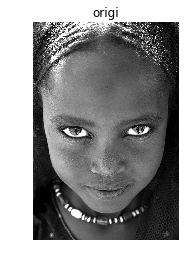

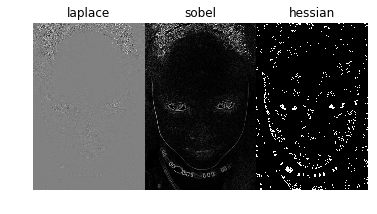

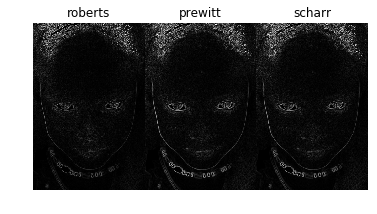

<Figure size 432x288 with 0 Axes>

In [211]:
run_edgerz(clear_img)

In [212]:
def canny_alg(img, ksize=9, sigma=1, maxmin=1, lo=0.45, hi=0.5):
    ## 1. smooth image
    ## 2. get sobel @ 
    ## 3. maxmin remove below threshold edges 
    ## 4. hystereses 
    smooth = skimage.filters.gaussian(img)
    sobel_derivatives = skimage.filters.sobel(smooth)
    #minmax_edgez = skimage.filters.threshold_minimum(sobel_derivatives)
    minmax_edgez = sobel_derivatives
    canny_edgez = skimage.filters.apply_hysteresis_threshold(minmax_edgez, lo, hi)
    
    plotter.show_image_list(
        [sobel_derivatives, canny_edgez, canny_edgez+smooth],
        titlez=['sobel', 'canny', 'output'], nc=3)
    plt.clf();
    
    print("Differences")
    plotter.show_image_list(
        [np.abs(sobel_derivatives-img), 
         np.abs(canny_edgez-sobel_derivatives), img],
        titlez=['sobel-origi', 'canny-smooth', 'origi'], nc=3)

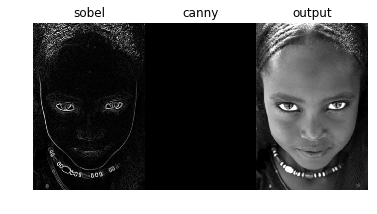

Differences


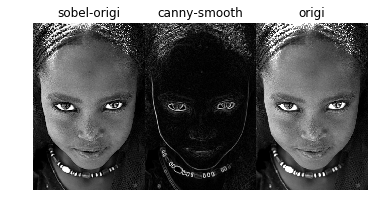

In [213]:
canny_alg(clear_img)

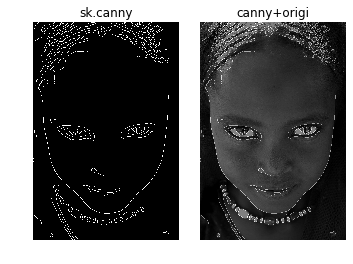

In [203]:
## SKImage canny
cannied = skimage.feature.canny(clear_img, sigma=2.5)
plotter.show_image_list([cannied, clear_img+cannied], titlez=['sk.canny', 'canny+origi'])

In [183]:
def unsharp_mask(img, scaler=10, ksig=9):
    smooth = filters.BaseFilter.apply(img, kernels.make_gaussian_kern(ksig))
    outsie = img + scaler*(img - smooth)
    
    plotter.show_image_list(
        [img, outsie, np.abs(img - outsie)],
        titlez=['origi', 'unsharp', 'diff'], nc=3
        )

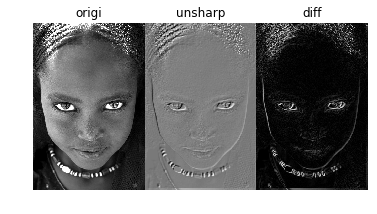

In [184]:
unsharp_mask(clear_img)

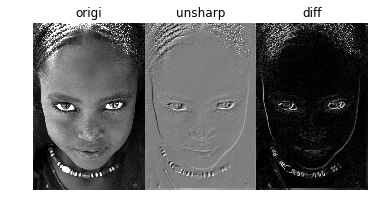

In [185]:
unsharp_mask(clear_img, scaler=100)

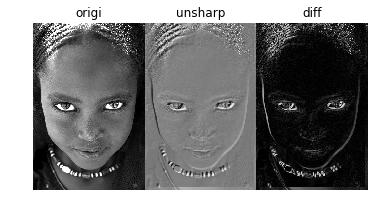

In [186]:
unsharp_mask(clear_img, ksig=13)

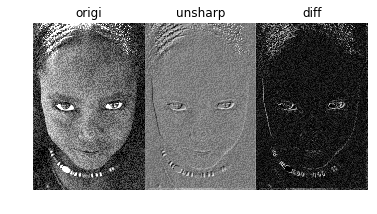

In [187]:
unsharp_mask(noisy_img)

# Bandpass Filtering